In [148]:
import pandas as pd
csvdata = pd.read_csv("C:/Users/Cindy/Desktop/程式語言/期末報告/歷年各縣市垃圾清理統計表 (2).csv")
city_csvdata=csvdata[['縣市名稱','Resource Recovery Rate','District']]
total_csvdata=city_csvdata[:23]
total_csvdata

,縣市名稱,Resource Recovery Rate,District
0,新北市,57.96%,New Taipei City
1,臺北市,64.35%,Taipei City
2,桃園市,59.94%,Taoyuan City
3,臺中市,55.73%,Taichung City
4,臺南市,55.77%,Tainan City
5,高雄市,57.12%,Kaohsiung City
6,宜蘭縣,54.19%,Ilan County
7,新竹縣,56.78%,Hsinchu County
8,苗栗縣,51.69%,Miaoli County
9,彰化縣,53.32%,Changhwa County


In [150]:
import matplotlib.pyplot as plt
import geopandas as gp
import pandas as pd
import numpy as np
nep_districts = gp.read_file(r'C:/Users/Cindy/Downloads/L14-Taiwan Population/TWN_adm/TWN_adm2.shp',encoding='utf-8')
nep_districts = nep_districts[['NAME_2', 'geometry']]
nep_districts.rename(columns = {'NAME_2' : 'District'}, inplace = True)
nep_districts

,District,geometry
0,Kaohsiung City,"MULTIPOLYGON (((120.23904 22.75155, 120.23875 ..."
1,None,"POLYGON ((116.71722 20.70959, 116.71778 20.709..."
2,Taipei City,"POLYGON ((121.52582 24.95191, 121.45911 24.930..."
3,Changhwa,"MULTIPOLYGON (((120.46427 24.16347, 120.46403 ..."
4,Chiayi,"MULTIPOLYGON (((120.13403 23.37264, 120.13403 ..."
5,Hsinchu,"MULTIPOLYGON (((121.25690 24.36170, 121.22860 ..."
6,Hualien,"MULTIPOLYGON (((120.99192 23.47921, 121.06472 ..."
7,Ilan,"MULTIPOLYGON (((121.84292 24.47625, 121.84236 ..."
8,Kaohsiung,"MULTIPOLYGON (((120.33847 22.55153, 120.33847 ..."
9,Keelung City,"MULTIPOLYGON (((121.78680 25.19514, 121.78680 ..."


In [151]:
nep_districts.replace('Changhwa', 'Changhwa County', inplace = True)
nep_districts.replace('Chiayi', 'Chiayi County', inplace = True)
nep_districts.replace('Hsinchu', 'Hsinchu County', inplace = True)
nep_districts.replace('Hualien', 'Hualien County', inplace = True)
nep_districts.replace('Ilan', 'Ilan County', inplace = True)
nep_districts.replace('Keelung City', 'Keelung City', inplace = True)
nep_districts.replace('Miaoli', 'Miaoli County', inplace = True)
nep_districts.replace('Nantou', 'Nantou County', inplace = True)
nep_districts.replace('Penghu', 'Penghu County', inplace = True)
nep_districts.replace('Pingtung', 'Pingtung County', inplace = True)
nep_districts.replace('Taichung', 'Taichung', inplace = True)
nep_districts.replace('Tainan', 'Tainan', inplace = True)
nep_districts.replace('Taipei', 'New Taipei City', inplace = True)
nep_districts.replace('Taitung', 'Taitung County', inplace = True)
nep_districts.replace('Taoyuan', 'Taoyuan City', inplace = True)
nep_districts.replace('Yunlin', 'Yunlin County', inplace = True)
nep_districts

,District,geometry
0,Kaohsiung City,"(POLYGON ((120.2390365600586 22.7515544891358,..."
1,None,"POLYGON ((116.7172241210938 20.70959472656256,..."
2,Taipei City,"POLYGON ((121.5258178710939 24.95191001892101,..."
3,Changhwa County,"(POLYGON ((120.4642715454102 24.1634731292724,..."
4,Chiayi County,(POLYGON ((120.1340255737306 23.37264060974132...
5,Hsinchu County,"(POLYGON ((121.2568969726563 24.3617000579834,..."
6,Hualien County,(POLYGON ((120.9919204711915 23.47921180725092...
7,Ilan County,(POLYGON ((121.8429183959961 24.47624969482428...
8,Kaohsiung,(POLYGON ((120.3384704589845 22.55152702331554...
9,Keelung City,(POLYGON ((121.7868041992188 25.19513893127447...


In [152]:
nep_districts = nep_districts.merge(total_csvdata, on = 'District')
nep_districts

,District,geometry,縣市名稱,Resource Recovery Rate
0,Kaohsiung City,"MULTIPOLYGON (((120.23904 22.75155, 120.23875 ...",高雄市,57.12%
1,None,"POLYGON ((116.71722 20.70959, 116.71778 20.709...",金門縣,54.11%
2,Taipei City,"POLYGON ((121.52582 24.95191, 121.45911 24.930...",臺北市,64.35%
3,Changhwa County,"MULTIPOLYGON (((120.46427 24.16347, 120.46403 ...",彰化縣,53.32%
4,Chiayi County,"MULTIPOLYGON (((120.13403 23.37264, 120.13403 ...",嘉義縣,55.72%
5,Hsinchu County,"MULTIPOLYGON (((121.25690 24.36170, 121.22860 ...",新竹縣,56.78%
6,Hualien County,"MULTIPOLYGON (((120.99192 23.47921, 121.06472 ...",花蓮縣,53.18%
7,Ilan County,"MULTIPOLYGON (((121.84292 24.47625, 121.84236 ...",宜蘭縣,54.19%
8,Kaohsiung,"MULTIPOLYGON (((120.33847 22.55153, 120.33847 ...",高雄縣,57.12%
9,Keelung City,"MULTIPOLYGON (((121.78680 25.19514, 121.78680 ...",基隆市,53.73%


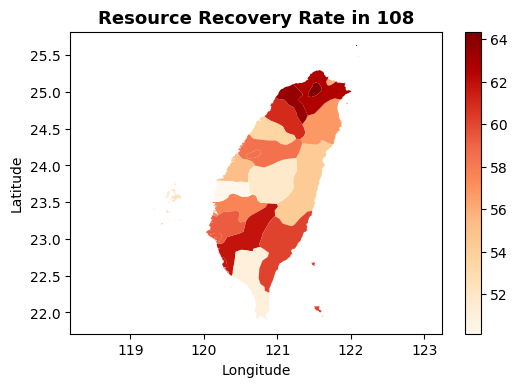

In [145]:
from matplotlib.colors import Normalize
from matplotlib import cm
from pylab import *
ax=nep_districts.plot(column = 'Resource Recovery Rate', cmap = 'OrRd', legend = False)  
norm = Normalize(vmin=50.15, vmax=64.35)
n_cmap = cm.ScalarMappable(norm=norm, cmap='OrRd')
ax.get_figure().colorbar(n_cmap)
plt.xlabel("Longitude")                # 設定x軸標題及粗體
plt.ylabel("Latitude")                 # 設定y軸標題及粗體
plt.axis('equal')
plt.title("Resource Recovery Rate in 108",fontsize = 13, fontweight = "bold", y = 1.1)
plt.show()#縣在投影片上的